In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

In [2]:
import os

try:
    os.mkdir("../PLOTS/NF_SUB_AGE")
except:
    print("NF_AGE_GENDER dir exists.")

#For testing, leave commented
swivel = 0
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]

desired_file_prefix = "NF_AGE" 

normalize_data=True

by_year = 1
lnconvert=False
 

# FUNCTIONS

In [3]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color


In [4]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [5]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
NF_AGE_NR_all.csv
NF_AGE_45to54_all.csv
NF_AGE_16to19_all.csv
NF_AGE_65plus_all.csv
NF_AGE_55to64_all.csv
NF_AGE_20to24_all.csv
NF_AGE_35to44_all.csv
NF_AGE_14to15_all.csv
NF_AGE_25to34_all.csv
dict_keys(['NF_AGE_NR', 'NF_AGE_45to54', 'NF_AGE_16to19', 'NF_AGE_65plus', 'NF_AGE_55to64', 'NF_AGE_20to24', 'NF_AGE_35to44', 'NF_AGE_14to15', 'NF_AGE_25to34'])
############ OCCUPATION ############
11-0000 Management Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
11-0000 Management Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
11-0000 Manageme

/home/ediaz/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ediaz/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


############ OCCUPATION ############
11-0000 Management Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
11-0000 Management Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
11-0000 Management Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
11-0000 Management Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
11-0000 Management Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
11-0000 Management Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
11-0000 Management Occupati

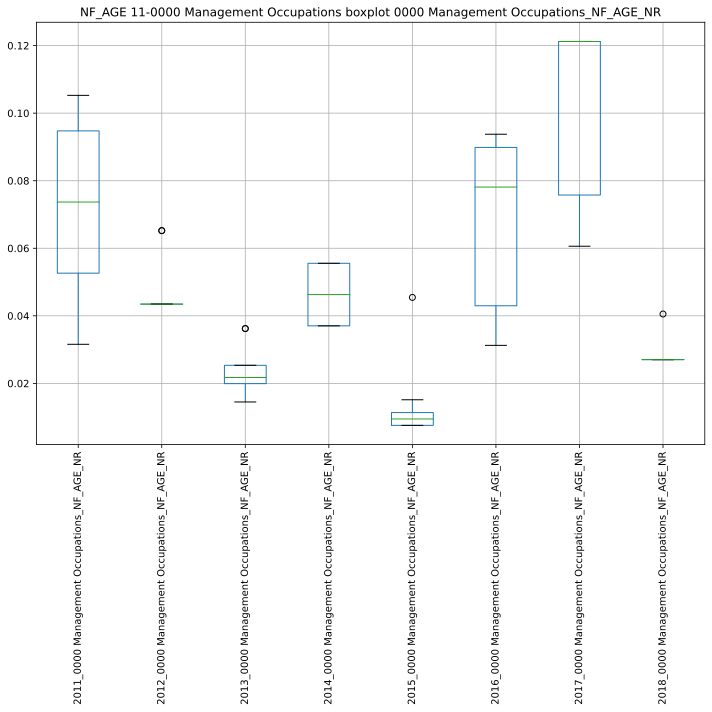

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113918.220411:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113918.263805:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113918.468018:INFO:headless_shell.cc(660)] Written to file /tmp/tmp5p45pphb/temp.png.
[1013/113918.690521:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113918.719344:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113918.998083:INFO:headless_shell.cc(660)] Written to file /tmp/tmpax82slyi/temp.png.
[1013/113919.270867:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113919.308429:WARNI

,2011_0000 Management Occupations_NF_AGE_NR,2012_0000 Management Occupations_NF_AGE_NR,2013_0000 Management Occupations_NF_AGE_NR,2014_0000 Management Occupations_NF_AGE_NR,2015_0000 Management Occupations_NF_AGE_NR,2016_0000 Management Occupations_NF_AGE_NR,2017_0000 Management Occupations_NF_AGE_NR,2018_0000 Management Occupations_NF_AGE_NR
2011_0000 Management Occupations_NF_AGE_NR,1.000000,-0.195366,-0.288975,1.000000,0.388032,-0.909799,-0.662266,-0.838525
2012_0000 Management Occupations_NF_AGE_NR,-0.195366,1.000000,0.927173,nan,0.478091,nan,nan,1.000000
2013_0000 Management Occupations_NF_AGE_NR,-0.288975,0.927173,1.000000,-1.000000,0.688247,-1.000000,nan,0.927173
2014_0000 Management Occupations_NF_AGE_NR,1.000000,nan,-1.000000,1.000000,nan,nan,nan,nan
2015_0000 Management Occupations_NF_AGE_NR,0.388032,0.478091,0.688247,nan,1.000000,-0.970725,-1.000000,-0.142675
2016_0000 Management Occupations_NF_AGE_NR,-0.909799,nan,-1.000000,nan,-0.970725,1.000000,1.000000,nan
2017_0000 Management Occupations_NF_AGE_NR,-0.662266,nan,nan,nan,-1.000000,1.000000,1.000000,nan
2018_0000 Management Occupations_NF_AGE_NR,-0.838525,1.000000,0.927173,nan,-0.142675,nan,nan,1.000000


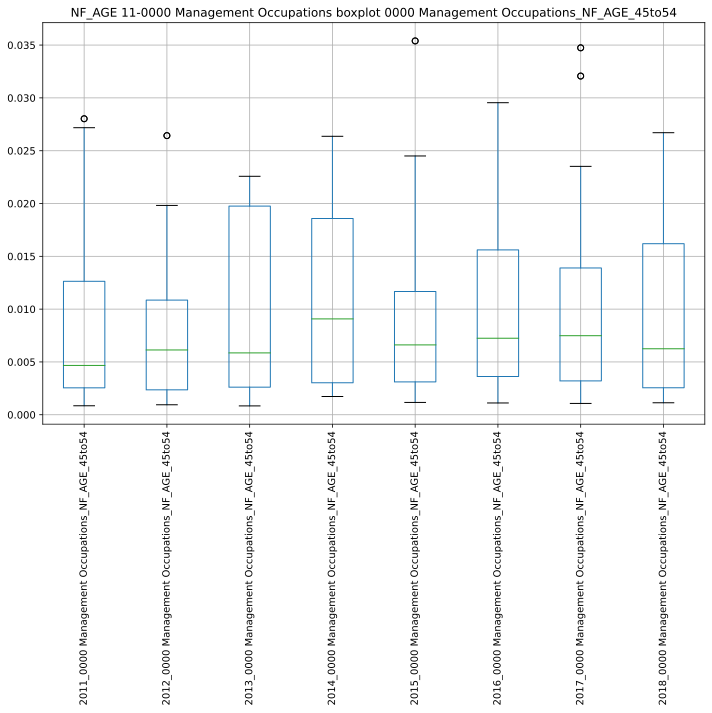

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113922.182929:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113922.210991:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113922.433492:INFO:headless_shell.cc(660)] Written to file /tmp/tmptx2qfoma/temp.png.
[1013/113922.661741:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113922.699111:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113923.005155:INFO:headless_shell.cc(660)] Written to file /tmp/tmprottji33/temp.png.
[1013/113923.270862:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113923.307503:WARNI

,2011_0000 Management Occupations_NF_AGE_45to54,2012_0000 Management Occupations_NF_AGE_45to54,2013_0000 Management Occupations_NF_AGE_45to54,2014_0000 Management Occupations_NF_AGE_45to54,2015_0000 Management Occupations_NF_AGE_45to54,2016_0000 Management Occupations_NF_AGE_45to54,2017_0000 Management Occupations_NF_AGE_45to54,2018_0000 Management Occupations_NF_AGE_45to54
2011_0000 Management Occupations_NF_AGE_45to54,1.000000,0.636962,-0.416362,0.215725,0.859860,0.237380,0.346739,0.082268
2012_0000 Management Occupations_NF_AGE_45to54,0.636962,1.000000,0.069524,0.333130,0.614774,0.193444,0.097227,0.151217
2013_0000 Management Occupations_NF_AGE_45to54,-0.416362,0.069524,1.000000,-0.085009,-0.116657,0.328761,0.143765,0.114473
2014_0000 Management Occupations_NF_AGE_45to54,0.215725,0.333130,-0.085009,1.000000,0.125930,0.164406,-0.033652,0.098881
2015_0000 Management Occupations_NF_AGE_45to54,0.859860,0.614774,-0.116657,0.125930,1.000000,0.090374,0.489943,0.156976
2016_0000 Management Occupations_NF_AGE_45to54,0.237380,0.193444,0.328761,0.164406,0.090374,1.000000,0.448543,0.095250
2017_0000 Management Occupations_NF_AGE_45to54,0.346739,0.097227,0.143765,-0.033652,0.489943,0.448543,1.000000,-0.093054
2018_0000 Management Occupations_NF_AGE_45to54,0.082268,0.151217,0.114473,0.098881,0.156976,0.095250,-0.093054,1.000000


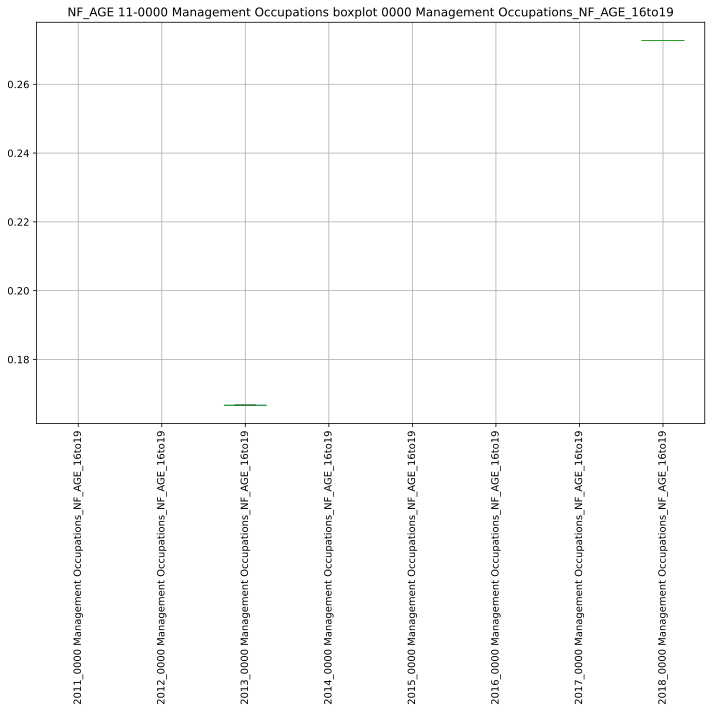

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113925.911170:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113925.949977:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113926.181922:INFO:headless_shell.cc(660)] Written to file /tmp/tmpgggdiq17/temp.png.
[1013/113926.399779:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113926.437615:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113926.708277:INFO:headless_shell.cc(660)] Written to file /tmp/tmpgofo5w_7/temp.png.
[1013/113926.985049:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113927.026976:WARNI

,2011_0000 Management Occupations_NF_AGE_16to19,2012_0000 Management Occupations_NF_AGE_16to19,2013_0000 Management Occupations_NF_AGE_16to19,2014_0000 Management Occupations_NF_AGE_16to19,2015_0000 Management Occupations_NF_AGE_16to19,2016_0000 Management Occupations_NF_AGE_16to19,2017_0000 Management Occupations_NF_AGE_16to19,2018_0000 Management Occupations_NF_AGE_16to19
2011_0000 Management Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2012_0000 Management Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2013_0000 Management Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2014_0000 Management Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2015_0000 Management Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2016_0000 Management Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2017_0000 Management Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2018_0000 Management Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan


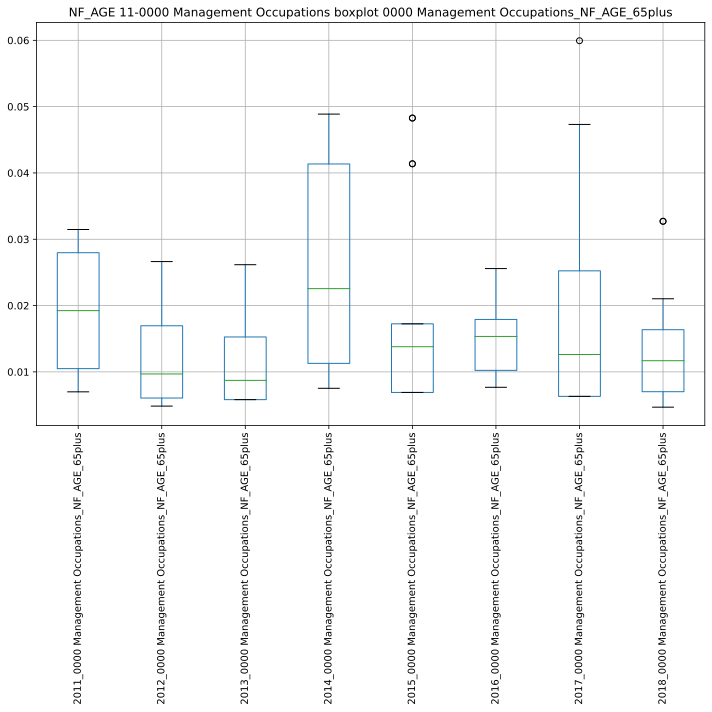

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113929.641679:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113929.679943:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113929.885285:INFO:headless_shell.cc(660)] Written to file /tmp/tmpx3371tba/temp.png.
[1013/113930.098789:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113930.136160:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113930.454303:INFO:headless_shell.cc(660)] Written to file /tmp/tmpvz8ii56x/temp.png.
[1013/113930.735202:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113930.774229:WARNI

,2011_0000 Management Occupations_NF_AGE_65plus,2012_0000 Management Occupations_NF_AGE_65plus,2013_0000 Management Occupations_NF_AGE_65plus,2014_0000 Management Occupations_NF_AGE_65plus,2015_0000 Management Occupations_NF_AGE_65plus,2016_0000 Management Occupations_NF_AGE_65plus,2017_0000 Management Occupations_NF_AGE_65plus,2018_0000 Management Occupations_NF_AGE_65plus
2011_0000 Management Occupations_NF_AGE_65plus,1.000000,0.624289,-0.454399,0.141655,0.162993,-0.361898,-0.017372,-0.092976
2012_0000 Management Occupations_NF_AGE_65plus,0.624289,1.000000,-0.122238,0.382252,0.409495,-0.582738,-0.056855,0.295846
2013_0000 Management Occupations_NF_AGE_65plus,-0.454399,-0.122238,1.000000,-0.079749,0.180003,0.122426,0.147203,0.206187
2014_0000 Management Occupations_NF_AGE_65plus,0.141655,0.382252,-0.079749,1.000000,-0.084841,0.163155,0.131659,0.388577
2015_0000 Management Occupations_NF_AGE_65plus,0.162993,0.409495,0.180003,-0.084841,1.000000,-0.092813,-0.178741,-0.110011
2016_0000 Management Occupations_NF_AGE_65plus,-0.361898,-0.582738,0.122426,0.163155,-0.092813,1.000000,0.754931,0.108624
2017_0000 Management Occupations_NF_AGE_65plus,-0.017372,-0.056855,0.147203,0.131659,-0.178741,0.754931,1.000000,0.345346
2018_0000 Management Occupations_NF_AGE_65plus,-0.092976,0.295846,0.206187,0.388577,-0.110011,0.108624,0.345346,1.000000


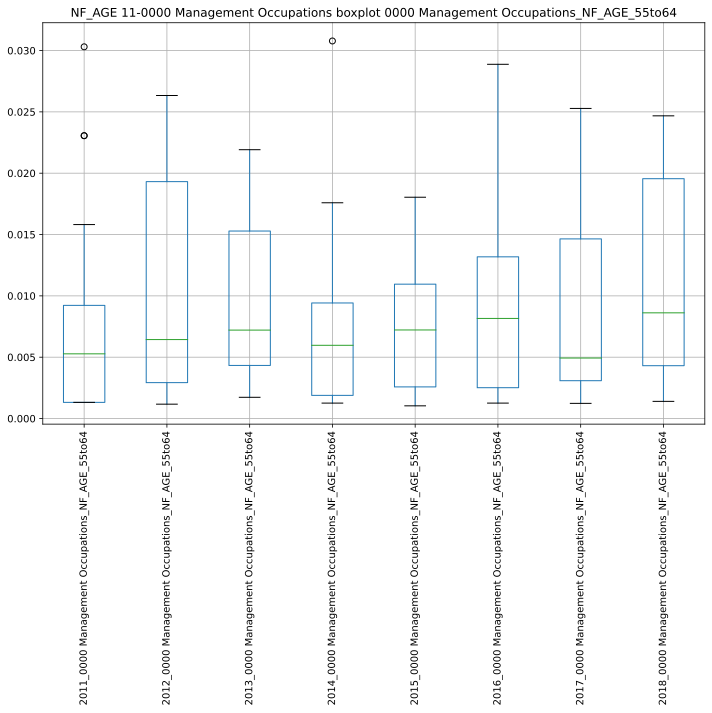

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113933.478230:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113933.518192:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113933.753351:INFO:headless_shell.cc(660)] Written to file /tmp/tmpbwp61s_2/temp.png.
[1013/113933.981370:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113934.013899:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113934.299363:INFO:headless_shell.cc(660)] Written to file /tmp/tmpu_cn9kqn/temp.png.
[1013/113934.563053:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113934.600363:WARNI

,2011_0000 Management Occupations_NF_AGE_55to64,2012_0000 Management Occupations_NF_AGE_55to64,2013_0000 Management Occupations_NF_AGE_55to64,2014_0000 Management Occupations_NF_AGE_55to64,2015_0000 Management Occupations_NF_AGE_55to64,2016_0000 Management Occupations_NF_AGE_55to64,2017_0000 Management Occupations_NF_AGE_55to64,2018_0000 Management Occupations_NF_AGE_55to64
2011_0000 Management Occupations_NF_AGE_55to64,1.000000,0.141444,0.534258,0.231397,0.239172,0.162863,-0.160751,-0.027755
2012_0000 Management Occupations_NF_AGE_55to64,0.141444,1.000000,0.514998,0.072044,-0.029409,0.568218,-0.368948,0.115005
2013_0000 Management Occupations_NF_AGE_55to64,0.534258,0.514998,1.000000,0.232739,0.279317,0.173319,-0.291577,0.157050
2014_0000 Management Occupations_NF_AGE_55to64,0.231397,0.072044,0.232739,1.000000,0.453038,-0.045369,0.437399,-0.200194
2015_0000 Management Occupations_NF_AGE_55to64,0.239172,-0.029409,0.279317,0.453038,1.000000,0.240317,0.328698,-0.050372
2016_0000 Management Occupations_NF_AGE_55to64,0.162863,0.568218,0.173319,-0.045369,0.240317,1.000000,0.052062,0.700623
2017_0000 Management Occupations_NF_AGE_55to64,-0.160751,-0.368948,-0.291577,0.437399,0.328698,0.052062,1.000000,0.283965
2018_0000 Management Occupations_NF_AGE_55to64,-0.027755,0.115005,0.157050,-0.200194,-0.050372,0.700623,0.283965,1.000000


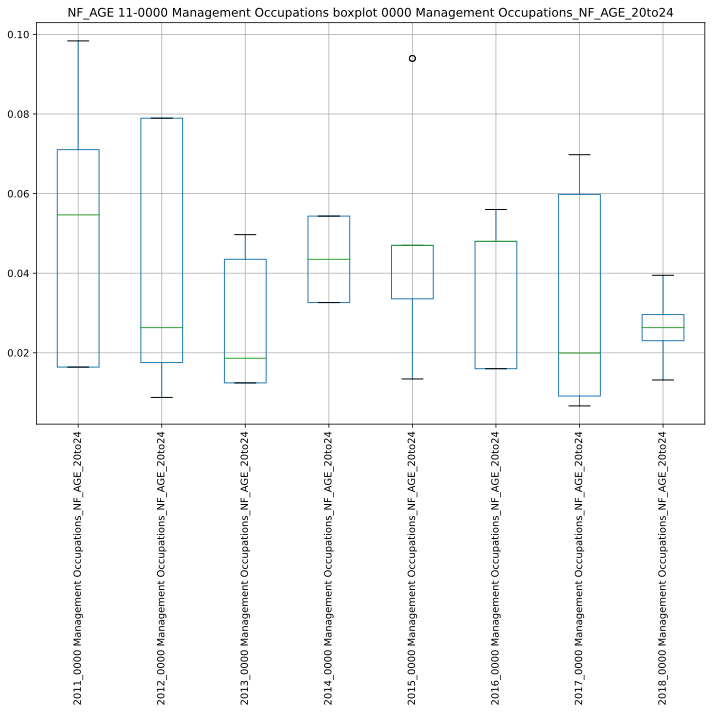

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113937.297464:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113937.325482:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113937.545311:INFO:headless_shell.cc(660)] Written to file /tmp/tmpmio6o15z/temp.png.
[1013/113937.763002:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113937.806491:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113938.118173:INFO:headless_shell.cc(660)] Written to file /tmp/tmp_69u50ro/temp.png.
[1013/113938.383484:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113938.421103:WARNI

,2011_0000 Management Occupations_NF_AGE_20to24,2012_0000 Management Occupations_NF_AGE_20to24,2013_0000 Management Occupations_NF_AGE_20to24,2014_0000 Management Occupations_NF_AGE_20to24,2015_0000 Management Occupations_NF_AGE_20to24,2016_0000 Management Occupations_NF_AGE_20to24,2017_0000 Management Occupations_NF_AGE_20to24,2018_0000 Management Occupations_NF_AGE_20to24
2011_0000 Management Occupations_NF_AGE_20to24,1.000000,-0.282796,0.751391,0.742323,-0.612731,-0.201575,-0.399127,0.176892
2012_0000 Management Occupations_NF_AGE_20to24,-0.282796,1.000000,0.120673,-0.306391,0.347098,0.196495,0.609942,0.269336
2013_0000 Management Occupations_NF_AGE_20to24,0.751391,0.120673,1.000000,0.439064,-0.686350,0.443037,0.494118,-0.123718
2014_0000 Management Occupations_NF_AGE_20to24,0.742323,-0.306391,0.439064,1.000000,-0.488570,0.952579,-0.113315,0.766965
2015_0000 Management Occupations_NF_AGE_20to24,-0.612731,0.347098,-0.686350,-0.488570,1.000000,-0.474086,0.082458,0.364973
2016_0000 Management Occupations_NF_AGE_20to24,-0.201575,0.196495,0.443037,0.952579,-0.474086,1.000000,0.584274,0.948119
2017_0000 Management Occupations_NF_AGE_20to24,-0.399127,0.609942,0.494118,-0.113315,0.082458,0.584274,1.000000,0.339817
2018_0000 Management Occupations_NF_AGE_20to24,0.176892,0.269336,-0.123718,0.766965,0.364973,0.948119,0.339817,1.000000


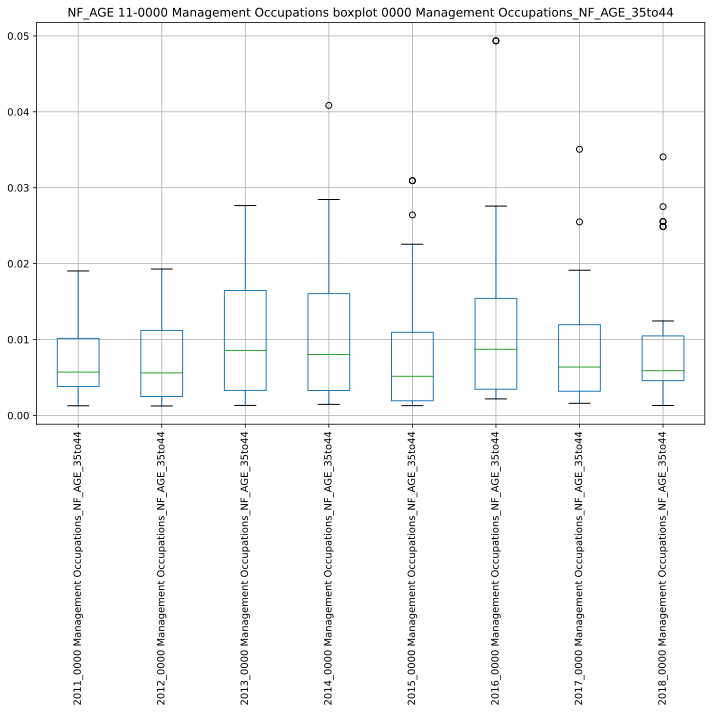

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113941.267780:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113941.307834:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113941.521218:INFO:headless_shell.cc(660)] Written to file /tmp/tmpqutf0y3b/temp.png.
[1013/113941.746930:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113941.791095:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113942.086809:INFO:headless_shell.cc(660)] Written to file /tmp/tmpuw8mvgha/temp.png.
[1013/113942.360075:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113942.397527:WARNI

,2011_0000 Management Occupations_NF_AGE_35to44,2012_0000 Management Occupations_NF_AGE_35to44,2013_0000 Management Occupations_NF_AGE_35to44,2014_0000 Management Occupations_NF_AGE_35to44,2015_0000 Management Occupations_NF_AGE_35to44,2016_0000 Management Occupations_NF_AGE_35to44,2017_0000 Management Occupations_NF_AGE_35to44,2018_0000 Management Occupations_NF_AGE_35to44
2011_0000 Management Occupations_NF_AGE_35to44,1.000000,0.119878,0.349712,0.354638,0.296917,0.224632,-0.002663,0.786666
2012_0000 Management Occupations_NF_AGE_35to44,0.119878,1.000000,0.310503,-0.077512,0.235546,-0.373016,0.759859,0.225950
2013_0000 Management Occupations_NF_AGE_35to44,0.349712,0.310503,1.000000,0.182296,0.143052,0.237357,0.262398,0.375094
2014_0000 Management Occupations_NF_AGE_35to44,0.354638,-0.077512,0.182296,1.000000,0.124840,0.168994,-0.053435,0.257556
2015_0000 Management Occupations_NF_AGE_35to44,0.296917,0.235546,0.143052,0.124840,1.000000,0.040361,0.064832,0.263406
2016_0000 Management Occupations_NF_AGE_35to44,0.224632,-0.373016,0.237357,0.168994,0.040361,1.000000,0.179720,0.083159
2017_0000 Management Occupations_NF_AGE_35to44,-0.002663,0.759859,0.262398,-0.053435,0.064832,0.179720,1.000000,-0.053328
2018_0000 Management Occupations_NF_AGE_35to44,0.786666,0.225950,0.375094,0.257556,0.263406,0.083159,-0.053328,1.000000


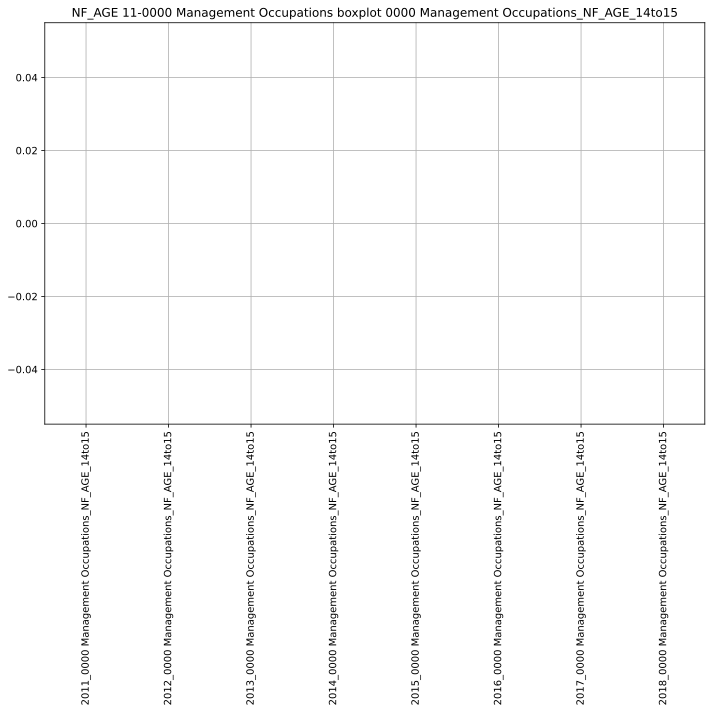

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113945.070911:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113945.107549:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113945.330019:INFO:headless_shell.cc(660)] Written to file /tmp/tmpzv9vib1p/temp.png.
[1013/113945.556142:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113945.593195:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113945.878913:INFO:headless_shell.cc(660)] Written to file /tmp/tmpnadk412x/temp.png.
[1013/113946.152195:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113946.194379:WARNI

,2011_0000 Management Occupations_NF_AGE_14to15,2012_0000 Management Occupations_NF_AGE_14to15,2013_0000 Management Occupations_NF_AGE_14to15,2014_0000 Management Occupations_NF_AGE_14to15,2015_0000 Management Occupations_NF_AGE_14to15,2016_0000 Management Occupations_NF_AGE_14to15,2017_0000 Management Occupations_NF_AGE_14to15,2018_0000 Management Occupations_NF_AGE_14to15
2011_0000 Management Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2012_0000 Management Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2013_0000 Management Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2014_0000 Management Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2015_0000 Management Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2016_0000 Management Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2017_0000 Management Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2018_0000 Management Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan


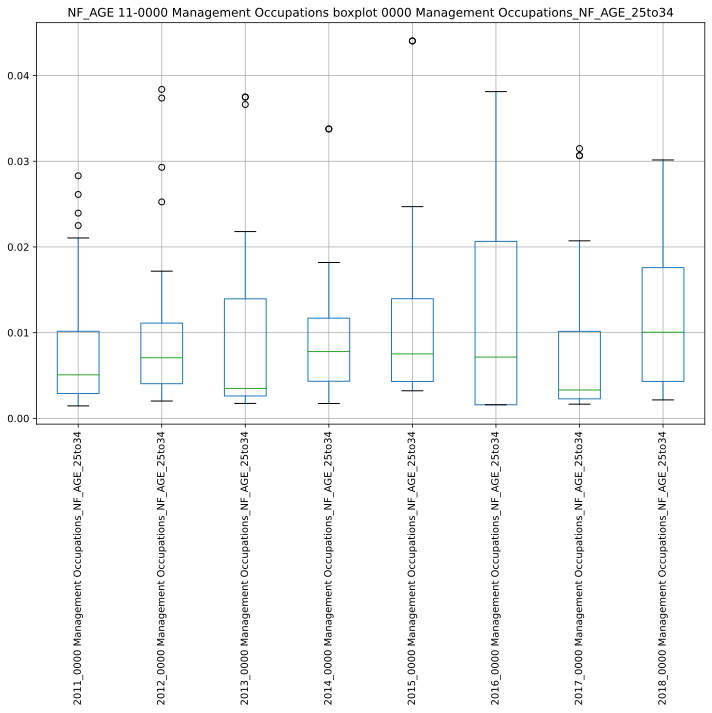

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113948.796901:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113948.832063:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113949.055652:INFO:headless_shell.cc(660)] Written to file /tmp/tmpb05jdl90/temp.png.
[1013/113949.275096:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113949.313457:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113949.616158:INFO:headless_shell.cc(660)] Written to file /tmp/tmp7uk7930a/temp.png.
[1013/113949.892222:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113949.924485:WARNI

,2011_0000 Management Occupations_NF_AGE_25to34,2012_0000 Management Occupations_NF_AGE_25to34,2013_0000 Management Occupations_NF_AGE_25to34,2014_0000 Management Occupations_NF_AGE_25to34,2015_0000 Management Occupations_NF_AGE_25to34,2016_0000 Management Occupations_NF_AGE_25to34,2017_0000 Management Occupations_NF_AGE_25to34,2018_0000 Management Occupations_NF_AGE_25to34
2011_0000 Management Occupations_NF_AGE_25to34,1.000000,0.037300,0.171577,-0.240440,-0.159570,0.290371,0.227012,-0.028063
2012_0000 Management Occupations_NF_AGE_25to34,0.037300,1.000000,0.682770,0.013762,0.260096,0.810450,0.180536,0.372048
2013_0000 Management Occupations_NF_AGE_25to34,0.171577,0.682770,1.000000,0.216260,-0.023220,-0.268061,0.055630,0.101768
2014_0000 Management Occupations_NF_AGE_25to34,-0.240440,0.013762,0.216260,1.000000,0.162869,-0.183055,0.207993,0.572244
2015_0000 Management Occupations_NF_AGE_25to34,-0.159570,0.260096,-0.023220,0.162869,1.000000,0.280663,-0.025183,0.506354
2016_0000 Management Occupations_NF_AGE_25to34,0.290371,0.810450,-0.268061,-0.183055,0.280663,1.000000,-0.022023,0.426688
2017_0000 Management Occupations_NF_AGE_25to34,0.227012,0.180536,0.055630,0.207993,-0.025183,-0.022023,1.000000,0.224079
2018_0000 Management Occupations_NF_AGE_25to34,-0.028063,0.372048,0.101768,0.572244,0.506354,0.426688,0.224079,1.000000


########################################## CORRELATIONS ###############################################
['11-0000 Management Occupations_NF_AGE_NR', '11-0000 Management Occupations_NF_AGE_45to54', '11-0000 Management Occupations_NF_AGE_16to19', '11-0000 Management Occupations_NF_AGE_65plus', '11-0000 Management Occupations_NF_AGE_55to64', '11-0000 Management Occupations_NF_AGE_20to24', '11-0000 Management Occupations_NF_AGE_35to44', '11-0000 Management Occupations_NF_AGE_14to15', '11-0000 Management Occupations_NF_AGE_25to34']


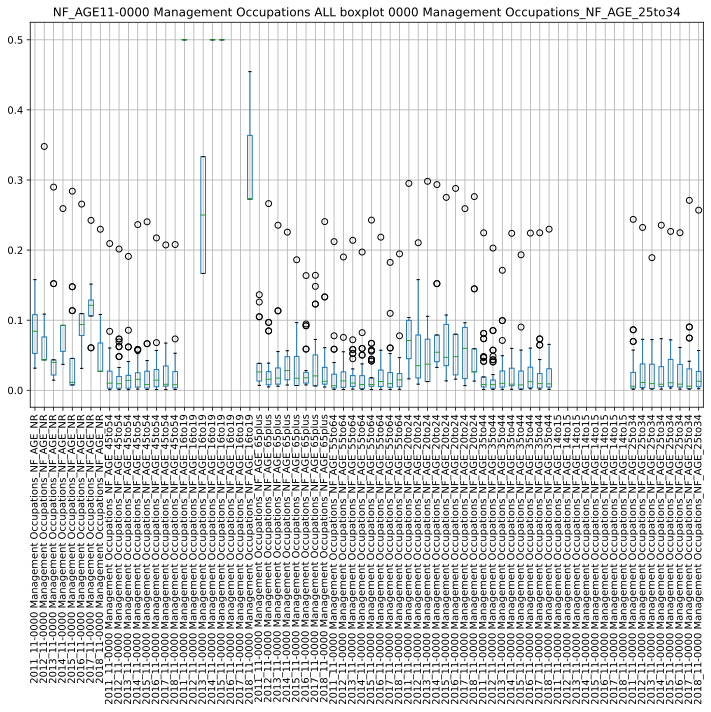

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/113958.892299:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113958.929504:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/113959.475497:INFO:headless_shell.cc(660)] Written to file /tmp/tmp7u6lecxa/temp.png.
[1013/113959.701999:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/113959.749886:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114000.489624:INFO:headless_shell.cc(660)] Written to file /tmp/tmp4kbk6t54/temp.png.
[1013/114000.824601:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114000.861914:WARNI

,2011_11-0000 Management Occupations_NF_AGE_NR,2012_11-0000 Management Occupations_NF_AGE_NR,2013_11-0000 Management Occupations_NF_AGE_NR,2014_11-0000 Management Occupations_NF_AGE_NR,2015_11-0000 Management Occupations_NF_AGE_NR,2016_11-0000 Management Occupations_NF_AGE_NR,2017_11-0000 Management Occupations_NF_AGE_NR,2018_11-0000 Management Occupations_NF_AGE_NR,2011_11-0000 Management Occupations_NF_AGE_45to54,2012_11-0000 Management Occupations_NF_AGE_45to54,2013_11-0000 Management Occupations_NF_AGE_45to54,2014_11-0000 Management Occupations_NF_AGE_45to54,2015_11-0000 Management Occupations_NF_AGE_45to54,2016_11-0000 Management Occupations_NF_AGE_45to54,2017_11-0000 Management Occupations_NF_AGE_45to54,2018_11-0000 Management Occupations_NF_AGE_45to54,2011_11-0000 Management Occupations_NF_AGE_16to19,2012_11-0000 Management Occupations_NF_AGE_16to19,2013_11-0000 Management Occupations_NF_AGE_16to19,2014_11-0000 Management Occupations_NF_AGE_16to19,2015_11-0000 Management Occupations_NF_AGE_16to19,2016_11-0000 Management Occupations_NF_AGE_16to19,2017_11-0000 Management Occupations_NF_AGE_16to19,2018_11-0000 Management Occupations_NF_AGE_16to19,2011_11-0000 Management Occupations_NF_AGE_65plus,2012_11-0000 Management Occupations_NF_AGE_65plus,2013_11-0000 Management Occupations_NF_AGE_65plus,2014_11-0000 Management Occupations_NF_AGE_65plus,2015_11-0000 Management Occupations_NF_AGE_65plus,2016_11-0000 Management Occupations_NF_AGE_65plus,2017_11-0000 Management Occupations_NF_AGE_65plus,2018_11-0000 Management Occupations_NF_AGE_65plus,2011_11-0000 Management Occupations_NF_AGE_55to64,2012_11-0000 Management Occupations_NF_AGE_55to64,2013_11-0000 Management Occupations_NF_AGE_55to64,2014_11-0000 Management Occupations_NF_AGE_55to64,2015_11-0000 Management Occupations_NF_AGE_55to64,2016_11-0000 Management Occupations_NF_AGE_55to64,2017_11-0000 Management Occupations_NF_AGE_55to64,2018_11-0000 Management Occupations_NF_AGE_55to64,2011_11-0000 Management Occupations_NF_AGE_20to24,2012_11-0000 Management Occupations_NF_AGE_20to24,2013_11-0000 Management Occupations_NF_AGE_20to24,2014_11-0000 Management Occupations_NF_AGE_20to24,2015_11-0000 Management Occupations_NF_AGE_20to24,2016_11-0000 Management Occupations_NF_AGE_20to24,2017_11-0000 Management Occupations_NF_AGE_20to24,2018_11-0000 Management Occupations_NF_AGE_20to24,2011_11-0000 Management Occupations_NF_AGE_35to44,2012_11-0000 Management Occupations_NF_AGE_35to44,2013_11-0000 Management Occupations_NF_AGE_35to44,2014_11-0000 Management Occupations_NF_AGE_35to44,2015_11-0000 Management Occupations_NF_AGE_35to44,2016_11-0000 Management Occupations_NF_AGE_35to44,2017_11-0000 Management Occupations_NF_AGE_35to44,2018_11-0000 Management Occupations_NF_AGE_35to44,2011_11-0000 Management Occupations_NF_AGE_14to15,2012_11-0000 Management Occupations_NF_AGE_14to15,2013_11-0000 Management Occupations_NF_AGE_14to15,2014_11-0000 Management Occupations_NF_AGE_14to15,2015_11-0000 Management Occupations_NF_AGE_14to15,2016_11-0000 Management Occupations_NF_AGE_14to15,2017_11-0000 Management Occupations_NF_AGE_14to15,2018_11-0000 Management Occupations_NF_AGE_14to15,2011_11-0000 Management Occupations_NF_AGE_25to34,2012_11-0000 Management Occupations_NF_AGE_25to34,2013_11-0000 Management Occupations_NF_AGE_25to34,2014_11-0000 Management Occupations_NF_AGE_25to34,2015_11-0000 Management Occupations_NF_AGE_25to34,2016_11-0000 Management Occupations_NF_AGE_25to34,2017_11-0000 Management Occupations_NF_AGE_25to34,2018_11-0000 Management Occupations_NF_AGE_25to34
2011_11-0000 Management Occupations_NF_AGE_NR,1.000000,0.213530,0.153649,0.302706,0.119342,-0.187840,-0.071867,0.242389,0.087493,0.255161,0.436362,0.124859,0.466650,0.274471,-0.333617,0.068638,nan,nan,-1.000000,nan,nan,nan,nan,-0.500000,-0.074930,0.189606,0.016661,-0.269294,-0.395928,-0.668717,0.169570,0.292755,-0.169224,0.041912,-0.102738,0.417923,0.255215,0.379480,0.091788,-0.178975,0.228979,-0.304354,0.517662,0.298925,0.2967

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty found.
NF_AGE_NR_all.csv
NF_AGE_45to54_all.csv
NF_AGE_16to19_all.csv
NF_AGE_65plus_all.csv
NF_AGE_55to64_all.csv
NF_AGE_20to24_all.csv
NF_AGE_35to44_all.csv
NF_AGE_14to15_all.csv
NF_AGE_25to34_all.csv
dict_keys(['NF_AGE_NR', 'NF_AGE_45to54', 'NF_AGE_16to19', 'NF_AGE_65plus', 'NF_AGE_55to64', 'NF_AGE_20to24', 'NF_AGE_35to44', 'NF_AGE_14to15', 'NF_AGE_25to34'])
############ OCCUPATION ############
13-0000 Business and Financial Operations Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
13-0000 Business and Financial Operations Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATIO

/home/ediaz/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ediaz/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


############ OCCUPATION ############
13-0000 Business and Financial Operations Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
13-0000 Business and Financial Operations Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
13-0000 Business and Financial Operations Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
13-0000 Business and Financial Operations Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
13-0000 Business and Financial Operations Occupations
 
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
############ OCCUPATION ############
13-0000 Business and Financial Operations Occupations
 
########## N

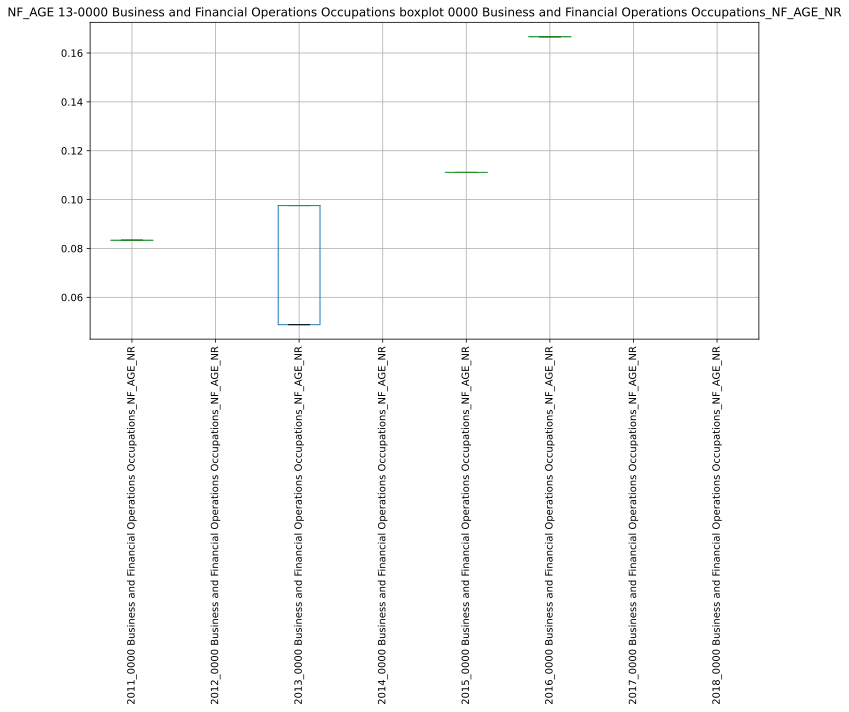

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114127.433287:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114127.463618:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114127.672894:INFO:headless_shell.cc(660)] Written to file /tmp/tmpi28q9er3/temp.png.
[1013/114127.903134:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114127.941432:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114128.213697:INFO:headless_shell.cc(660)] Written to file /tmp/tmpn2pzizrd/temp.png.
[1013/114128.480753:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114128.522162:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_NR,2012_0000 Business and Financial Operations Occupations_NF_AGE_NR,2013_0000 Business and Financial Operations Occupations_NF_AGE_NR,2014_0000 Business and Financial Operations Occupations_NF_AGE_NR,2015_0000 Business and Financial Operations Occupations_NF_AGE_NR,2016_0000 Business and Financial Operations Occupations_NF_AGE_NR,2017_0000 Business and Financial Operations Occupations_NF_AGE_NR,2018_0000 Business and Financial Operations Occupations_NF_AGE_NR
2011_0000 Business and Financial Operations Occupations_NF_AGE_NR,nan,nan,nan,nan,nan,nan,nan,nan
2012_0000 Business and Financial Operations Occupations_NF_AGE_NR,nan,nan,nan,nan,nan,nan,nan,nan
2013_0000 Business and Financial Operations Occupations_NF_AGE_NR,nan,nan,1.000000,nan,nan,nan,nan,nan
2014_0000 Business and Financial Operations Occupations_NF_AGE_NR,nan,nan,nan,nan,nan,nan,nan,nan
2015_0000 Business and Financial Operations Occupations_NF_AGE_NR,nan,nan,nan,nan,nan,nan,nan,nan
2016_0000 Business and Financial Operations Occupations_NF_AGE_NR,nan,nan,nan,nan,nan,nan,nan,nan
2017_0000 Business and Financial Operations Occupations_NF_AGE_NR,nan,nan,nan,nan,nan,nan,nan,nan
2018_0000 Business and Financial Operations Occupations_NF_AGE_NR,nan,nan,nan,nan,nan,nan,nan,nan


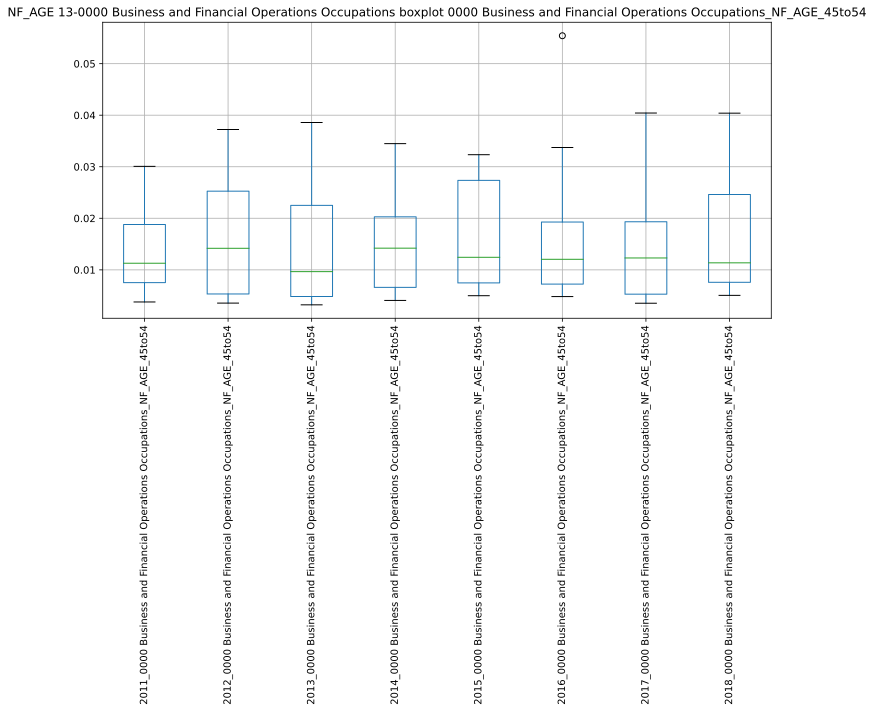

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114131.227568:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114131.265629:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114131.501433:INFO:headless_shell.cc(660)] Written to file /tmp/tmpvm5k8ftn/temp.png.
[1013/114131.722116:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114131.753409:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114132.045731:INFO:headless_shell.cc(660)] Written to file /tmp/tmppwylc_a5/temp.png.
[1013/114132.313136:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114132.354342:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_45to54,2012_0000 Business and Financial Operations Occupations_NF_AGE_45to54,2013_0000 Business and Financial Operations Occupations_NF_AGE_45to54,2014_0000 Business and Financial Operations Occupations_NF_AGE_45to54,2015_0000 Business and Financial Operations Occupations_NF_AGE_45to54,2016_0000 Business and Financial Operations Occupations_NF_AGE_45to54,2017_0000 Business and Financial Operations Occupations_NF_AGE_45to54,2018_0000 Business and Financial Operations Occupations_NF_AGE_45to54
2011_0000 Business and Financial Operations Occupations_NF_AGE_45to54,1.000000,-0.112990,0.044302,0.697177,0.037093,0.017068,-0.060123,-0.122841
2012_0000 Business and Financial Operations Occupations_NF_AGE_45to54,-0.112990,1.000000,0.272034,-0.214814,0.511988,0.191201,0.039509,0.319816
2013_0000 Business and Financial Operations Occupations_NF_AGE_45to54,0.044302,0.272034,1.000000,0.196609,0.051308,0.817505,0.289596,0.490535
2014_0000 Business and Financial Operations Occupations_NF_AGE_45to54,0.697177,-0.214814,0.196609,1.000000,-0.391622,0.003281,0.115222,0.074181
2015_0000 Business and Financial Operations Occupations_NF_AGE_45to54,0.037093,0.511988,0.051308,-0.391622,1.000000,0.184114,0.004861,0.535271
2016_0000 Business and Financial Operations Occupations_NF_AGE_45to54,0.017068,0.191201,0.817505,0.003281,0.184114,1.000000,0.651858,0.255936
2017_0000 Business and Financial Operations Occupations_NF_AGE_45to54,-0.060123,0.039509,0.289596,0.115222,0.004861,0.651858,1.000000,0.285695
2018_0000 Business and Financial Operations Occupations_NF_AGE_45to54,-0.122841,0.319816,0.490535,0.074181,0.535271,0.255936,0.285695,1.000000


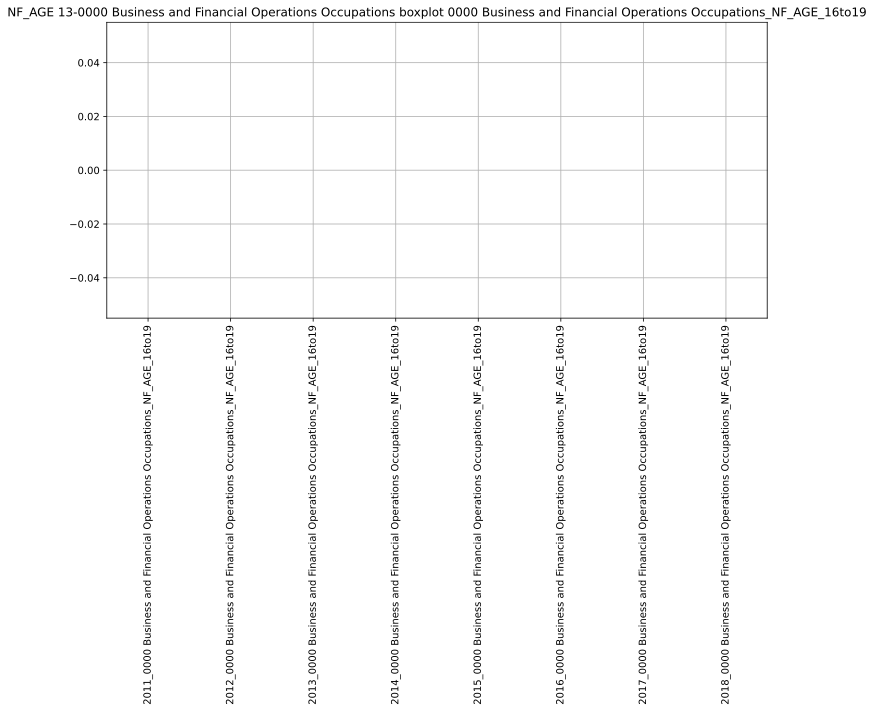

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114136.408399:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114136.449642:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114136.674509:INFO:headless_shell.cc(660)] Written to file /tmp/tmp6dsur_eb/temp.png.
[1013/114136.904871:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114136.941794:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114137.235704:INFO:headless_shell.cc(660)] Written to file /tmp/tmpnw5w3h_2/temp.png.
[1013/114137.492096:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114137.529901:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_16to19,2012_0000 Business and Financial Operations Occupations_NF_AGE_16to19,2013_0000 Business and Financial Operations Occupations_NF_AGE_16to19,2014_0000 Business and Financial Operations Occupations_NF_AGE_16to19,2015_0000 Business and Financial Operations Occupations_NF_AGE_16to19,2016_0000 Business and Financial Operations Occupations_NF_AGE_16to19,2017_0000 Business and Financial Operations Occupations_NF_AGE_16to19,2018_0000 Business and Financial Operations Occupations_NF_AGE_16to19
2011_0000 Business and Financial Operations Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2012_0000 Business and Financial Operations Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2013_0000 Business and Financial Operations Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2014_0000 Business and Financial Operations Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2015_0000 Business and Financial Operations Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2016_0000 Business and Financial Operations Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2017_0000 Business and Financial Operations Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan
2018_0000 Business and Financial Operations Occupations_NF_AGE_16to19,nan,nan,nan,nan,nan,nan,nan,nan


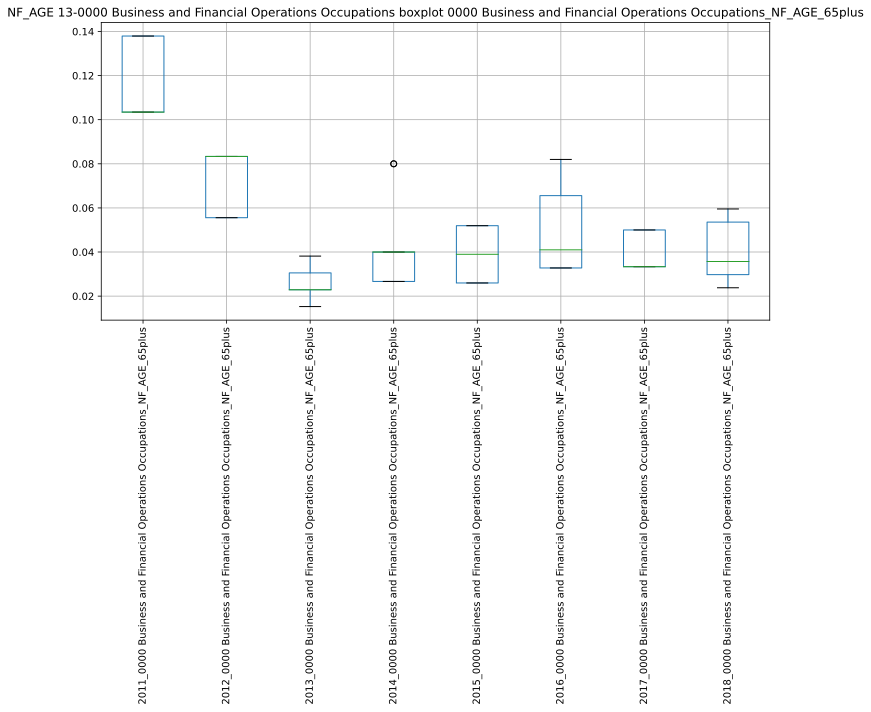

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114141.506095:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114141.543972:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114141.786893:INFO:headless_shell.cc(660)] Written to file /tmp/tmpp626dw8t/temp.png.
[1013/114142.004411:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114142.043406:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114142.356482:INFO:headless_shell.cc(660)] Written to file /tmp/tmpajj8db50/temp.png.
[1013/114142.618940:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114142.655823:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_65plus,2012_0000 Business and Financial Operations Occupations_NF_AGE_65plus,2013_0000 Business and Financial Operations Occupations_NF_AGE_65plus,2014_0000 Business and Financial Operations Occupations_NF_AGE_65plus,2015_0000 Business and Financial Operations Occupations_NF_AGE_65plus,2016_0000 Business and Financial Operations Occupations_NF_AGE_65plus,2017_0000 Business and Financial Operations Occupations_NF_AGE_65plus,2018_0000 Business and Financial Operations Occupations_NF_AGE_65plus
2011_0000 Business and Financial Operations Occupations_NF_AGE_65plus,1.000000,nan,-0.068041,nan,nan,0.408248,-0.408248,-0.842701
2012_0000 Business and Financial Operations Occupations_NF_AGE_65plus,nan,1.000000,-0.316228,-0.613941,0.198030,0.500000,0.000000,-1.000000
2013_0000 Business and Financial Operations Occupations_NF_AGE_65plus,-0.068041,-0.316228,1.000000,0.166667,-0.054153,-0.427821,-0.395285,0.193914
2014_0000 Business and Financial Operations Occupations_NF_AGE_65plus,nan,-0.613941,0.166667,1.000000,-0.738485,-0.661438,-0.500000,0.550482
2015_0000 Business and Financial Operations Occupations_NF_AGE_65plus,nan,0.198030,-0.054153,-0.738485,1.000000,0.599145,0.288675,-0.797017
2016_0000 Business and Financial Operations Occupations_NF_AGE_65plus,0.408248,0.500000,-0.427821,-0.661438,0.599145,1.000000,-0.000000,-0.533863
2017_0000 Business and Financial Operations Occupations_NF_AGE_65plus,-0.408248,0.000000,-0.395285,-0.500000,0.288675,-0.000000,1.000000,-0.095618
2018_0000 Business and Financial Operations Occupations_NF_AGE_65plus,-0.842701,-1.000000,0.193914,0.550482,-0.797017,-0.533863,-0.095618,1.000000


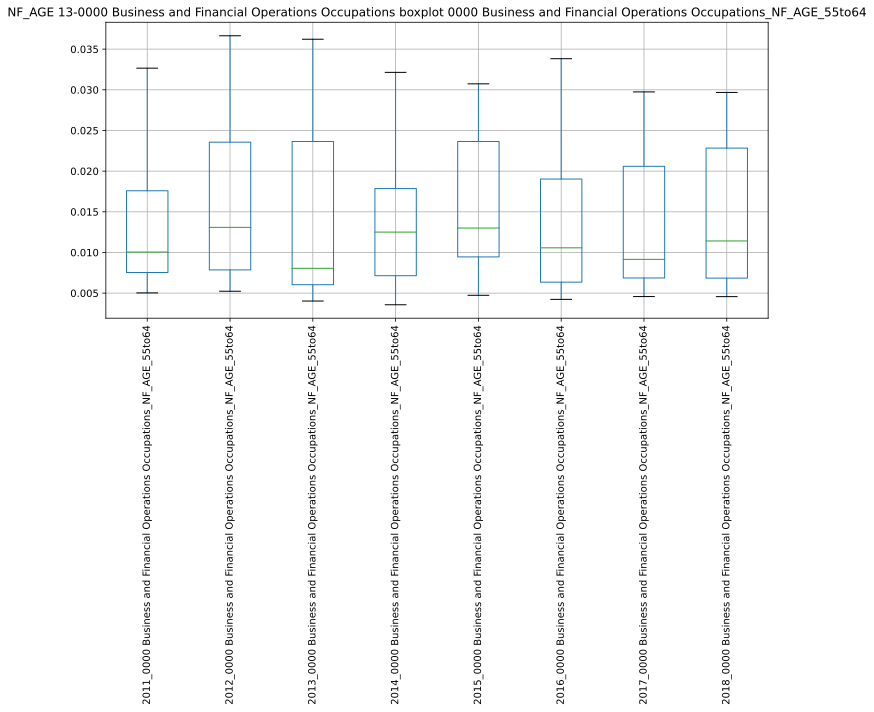

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114146.713138:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114146.751014:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114146.986350:INFO:headless_shell.cc(660)] Written to file /tmp/tmplrw26lzr/temp.png.
[1013/114147.207126:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114147.244468:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114147.533562:INFO:headless_shell.cc(660)] Written to file /tmp/tmpdqhk08id/temp.png.
[1013/114147.820283:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114147.858884:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_55to64,2012_0000 Business and Financial Operations Occupations_NF_AGE_55to64,2013_0000 Business and Financial Operations Occupations_NF_AGE_55to64,2014_0000 Business and Financial Operations Occupations_NF_AGE_55to64,2015_0000 Business and Financial Operations Occupations_NF_AGE_55to64,2016_0000 Business and Financial Operations Occupations_NF_AGE_55to64,2017_0000 Business and Financial Operations Occupations_NF_AGE_55to64,2018_0000 Business and Financial Operations Occupations_NF_AGE_55to64
2011_0000 Business and Financial Operations Occupations_NF_AGE_55to64,1.000000,0.112538,0.158169,0.238960,0.265838,0.532297,0.112648,0.153168
2012_0000 Business and Financial Operations Occupations_NF_AGE_55to64,0.112538,1.000000,0.121210,0.467340,0.335719,0.507324,-0.247379,0.405756
2013_0000 Business and Financial Operations Occupations_NF_AGE_55to64,0.158169,0.121210,1.000000,-0.332291,0.111761,-0.065700,0.594784,-0.088776
2014_0000 Business and Financial Operations Occupations_NF_AGE_55to64,0.238960,0.467340,-0.332291,1.000000,0.460506,0.782542,0.032222,0.137943
2015_0000 Business and Financial Operations Occupations_NF_AGE_55to64,0.265838,0.335719,0.111761,0.460506,1.000000,0.503478,0.050991,-0.144187
2016_0000 Business and Financial Operations Occupations_NF_AGE_55to64,0.532297,0.507324,-0.065700,0.782542,0.503478,1.000000,0.058090,0.500326
2017_0000 Business and Financial Operations Occupations_NF_AGE_55to64,0.112648,-0.247379,0.594784,0.032222,0.050991,0.058090,1.000000,-0.030175
2018_0000 Business and Financial Operations Occupations_NF_AGE_55to64,0.153168,0.405756,-0.088776,0.137943,-0.144187,0.500326,-0.030175,1.000000


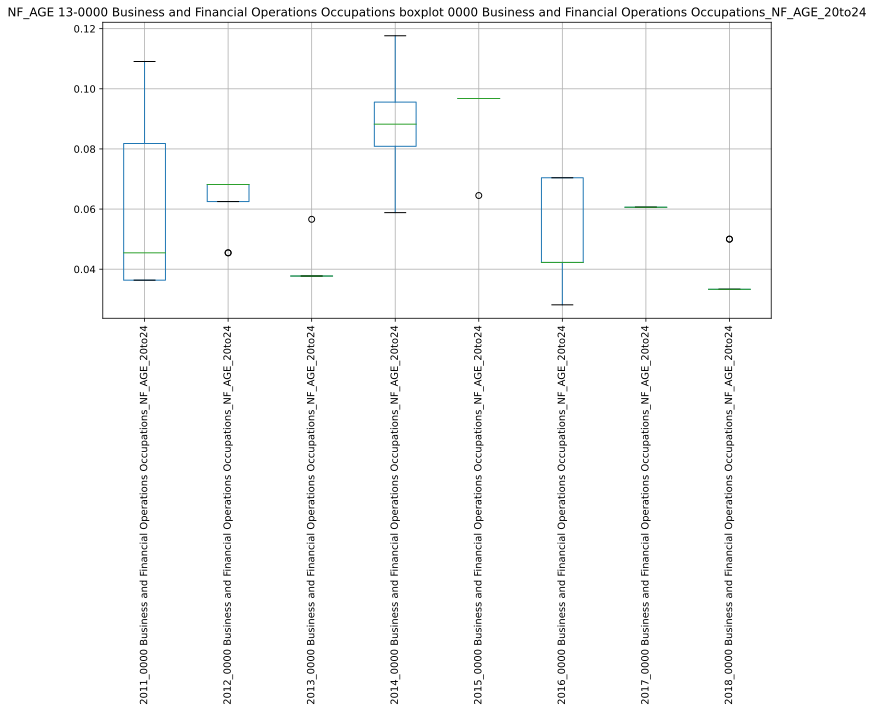

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114151.935131:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114151.972223:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114152.205979:INFO:headless_shell.cc(660)] Written to file /tmp/tmppi2r2v5c/temp.png.
[1013/114152.429781:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114152.467223:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114152.757768:INFO:headless_shell.cc(660)] Written to file /tmp/tmpga85amhk/temp.png.
[1013/114153.022162:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114153.059146:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_20to24,2012_0000 Business and Financial Operations Occupations_NF_AGE_20to24,2013_0000 Business and Financial Operations Occupations_NF_AGE_20to24,2014_0000 Business and Financial Operations Occupations_NF_AGE_20to24,2015_0000 Business and Financial Operations Occupations_NF_AGE_20to24,2016_0000 Business and Financial Operations Occupations_NF_AGE_20to24,2017_0000 Business and Financial Operations Occupations_NF_AGE_20to24,2018_0000 Business and Financial Operations Occupations_NF_AGE_20to24
2011_0000 Business and Financial Operations Occupations_NF_AGE_20to24,1.000000,-0.408248,0.946729,-0.188982,nan,0.587095,nan,-0.329720
2012_0000 Business and Financial Operations Occupations_NF_AGE_20to24,-0.408248,1.000000,nan,-0.000000,nan,nan,nan,0.316228
2013_0000 Business and Financial Operations Occupations_NF_AGE_20to24,0.946729,nan,1.000000,nan,nan,0.447214,nan,-0.188982
2014_0000 Business and Financial Operations Occupations_NF_AGE_20to24,-0.188982,-0.000000,nan,1.000000,nan,-0.816497,nan,-0.542326
2015_0000 Business and Financial Operations Occupations_NF_AGE_20to24,nan,nan,nan,nan,1.000000,-0.612372,nan,nan
2016_0000 Business and Financial Operations Occupations_NF_AGE_20to24,0.587095,nan,0.447214,-0.816497,-0.612372,1.000000,nan,0.707107
2017_0000 Business and Financial Operations Occupations_NF_AGE_20to24,nan,nan,nan,nan,nan,nan,nan,nan
2018_0000 Business and Financial Operations Occupations_NF_AGE_20to24,-0.329720,0.316228,-0.188982,-0.542326,nan,0.707107,nan,1.000000


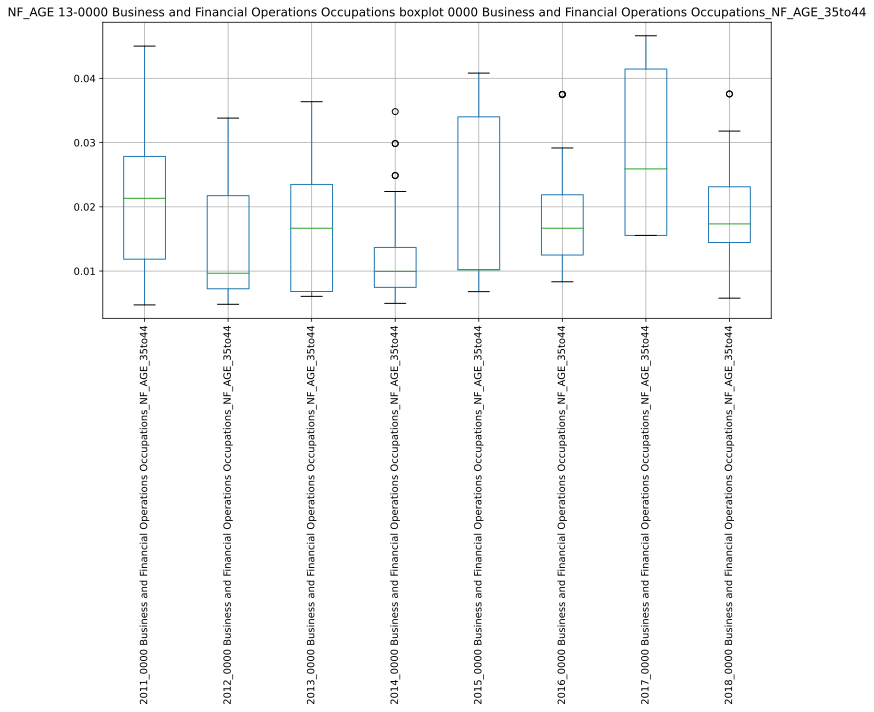

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114157.204761:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114157.244751:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114157.441963:INFO:headless_shell.cc(660)] Written to file /tmp/tmpu22g7swq/temp.png.
[1013/114157.662914:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114157.704064:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114157.969974:INFO:headless_shell.cc(660)] Written to file /tmp/tmpkqagki84/temp.png.
[1013/114158.239357:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114158.278010:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_35to44,2012_0000 Business and Financial Operations Occupations_NF_AGE_35to44,2013_0000 Business and Financial Operations Occupations_NF_AGE_35to44,2014_0000 Business and Financial Operations Occupations_NF_AGE_35to44,2015_0000 Business and Financial Operations Occupations_NF_AGE_35to44,2016_0000 Business and Financial Operations Occupations_NF_AGE_35to44,2017_0000 Business and Financial Operations Occupations_NF_AGE_35to44,2018_0000 Business and Financial Operations Occupations_NF_AGE_35to44
2011_0000 Business and Financial Operations Occupations_NF_AGE_35to44,1.000000,0.126143,-0.212218,-0.178946,0.441773,0.548592,-0.197481,0.307145
2012_0000 Business and Financial Operations Occupations_NF_AGE_35to44,0.126143,1.000000,0.048948,-0.095612,0.386961,-0.177567,-0.156014,0.229091
2013_0000 Business and Financial Operations Occupations_NF_AGE_35to44,-0.212218,0.048948,1.000000,0.032757,-0.146194,0.138990,-0.224942,0.042680
2014_0000 Business and Financial Operations Occupations_NF_AGE_35to44,-0.178946,-0.095612,0.032757,1.000000,0.074342,0.271682,0.298728,0.157207
2015_0000 Business and Financial Operations Occupations_NF_AGE_35to44,0.441773,0.386961,-0.146194,0.074342,1.000000,0.528850,-0.006199,0.599137
2016_0000 Business and Financial Operations Occupations_NF_AGE_35to44,0.548592,-0.177567,0.138990,0.271682,0.528850,1.000000,0.330554,0.746335
2017_0000 Business and Financial Operations Occupations_NF_AGE_35to44,-0.197481,-0.156014,-0.224942,0.298728,-0.006199,0.330554,1.000000,0.032806
2018_0000 Business and Financial Operations Occupations_NF_AGE_35to44,0.307145,0.229091,0.042680,0.157207,0.599137,0.746335,0.032806,1.000000


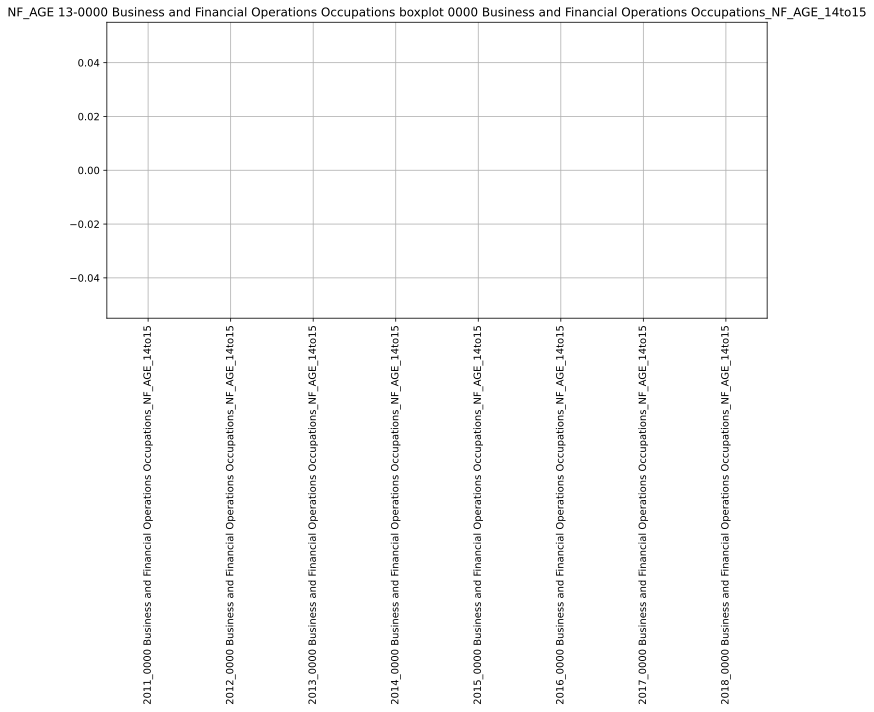

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114202.260209:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114202.300279:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114202.540238:INFO:headless_shell.cc(660)] Written to file /tmp/tmphp2u81ck/temp.png.
[1013/114202.770839:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114202.801347:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114203.083465:INFO:headless_shell.cc(660)] Written to file /tmp/tmpqks3htpm/temp.png.
[1013/114203.366173:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114203.401273:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_14to15,2012_0000 Business and Financial Operations Occupations_NF_AGE_14to15,2013_0000 Business and Financial Operations Occupations_NF_AGE_14to15,2014_0000 Business and Financial Operations Occupations_NF_AGE_14to15,2015_0000 Business and Financial Operations Occupations_NF_AGE_14to15,2016_0000 Business and Financial Operations Occupations_NF_AGE_14to15,2017_0000 Business and Financial Operations Occupations_NF_AGE_14to15,2018_0000 Business and Financial Operations Occupations_NF_AGE_14to15
2011_0000 Business and Financial Operations Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2012_0000 Business and Financial Operations Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2013_0000 Business and Financial Operations Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2014_0000 Business and Financial Operations Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2015_0000 Business and Financial Operations Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2016_0000 Business and Financial Operations Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2017_0000 Business and Financial Operations Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan
2018_0000 Business and Financial Operations Occupations_NF_AGE_14to15,nan,nan,nan,nan,nan,nan,nan,nan


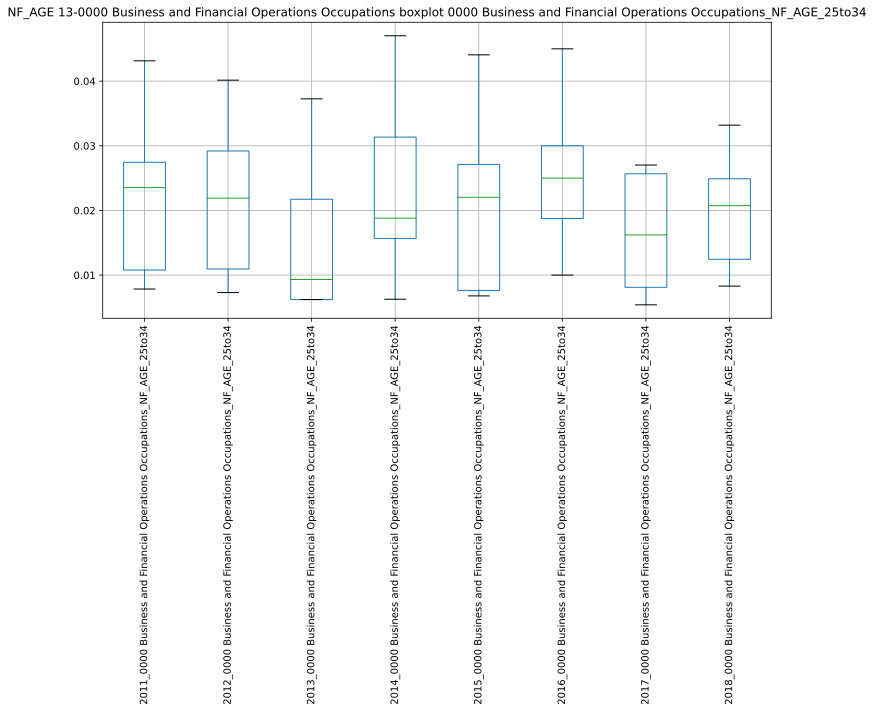

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114207.409440:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114207.438373:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114207.650588:INFO:headless_shell.cc(660)] Written to file /tmp/tmpds_epf5k/temp.png.
[1013/114207.878967:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114207.919974:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114208.212625:INFO:headless_shell.cc(660)] Written to file /tmp/tmp4jmkxoyt/temp.png.
[1013/114208.496533:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114208.526162:WARNI

,2011_0000 Business and Financial Operations Occupations_NF_AGE_25to34,2012_0000 Business and Financial Operations Occupations_NF_AGE_25to34,2013_0000 Business and Financial Operations Occupations_NF_AGE_25to34,2014_0000 Business and Financial Operations Occupations_NF_AGE_25to34,2015_0000 Business and Financial Operations Occupations_NF_AGE_25to34,2016_0000 Business and Financial Operations Occupations_NF_AGE_25to34,2017_0000 Business and Financial Operations Occupations_NF_AGE_25to34,2018_0000 Business and Financial Operations Occupations_NF_AGE_25to34
2011_0000 Business and Financial Operations Occupations_NF_AGE_25to34,1.000000,-0.209642,-0.174162,0.438673,0.195744,0.377541,0.236497,0.162773
2012_0000 Business and Financial Operations Occupations_NF_AGE_25to34,-0.209642,1.000000,0.127675,0.093161,-0.229718,0.309321,-0.147022,0.198846
2013_0000 Business and Financial Operations Occupations_NF_AGE_25to34,-0.174162,0.127675,1.000000,-0.021035,0.657102,0.046241,-0.246578,-0.470544
2014_0000 Business and Financial Operations Occupations_NF_AGE_25to34,0.438673,0.093161,-0.021035,1.000000,-0.413162,-0.113092,0.220613,0.423210
2015_0000 Business and Financial Operations Occupations_NF_AGE_25to34,0.195744,-0.229718,0.657102,-0.413162,1.000000,0.360597,-0.222000,-0.327481
2016_0000 Business and Financial Operations Occupations_NF_AGE_25to34,0.377541,0.309321,0.046241,-0.113092,0.360597,1.000000,0.114483,0.278764
2017_0000 Business and Financial Operations Occupations_NF_AGE_25to34,0.236497,-0.147022,-0.246578,0.220613,-0.222000,0.114483,1.000000,0.681266
2018_0000 Business and Financial Operations Occupations_NF_AGE_25to34,0.162773,0.198846,-0.470544,0.423210,-0.327481,0.278764,0.681266,1.000000


########################################## CORRELATIONS ###############################################
['13-0000 Business and Financial Operations Occupations_NF_AGE_NR', '13-0000 Business and Financial Operations Occupations_NF_AGE_45to54', '13-0000 Business and Financial Operations Occupations_NF_AGE_16to19', '13-0000 Business and Financial Operations Occupations_NF_AGE_65plus', '13-0000 Business and Financial Operations Occupations_NF_AGE_55to64', '13-0000 Business and Financial Operations Occupations_NF_AGE_20to24', '13-0000 Business and Financial Operations Occupations_NF_AGE_35to44', '13-0000 Business and Financial Operations Occupations_NF_AGE_14to15', '13-0000 Business and Financial Operations Occupations_NF_AGE_25to34']


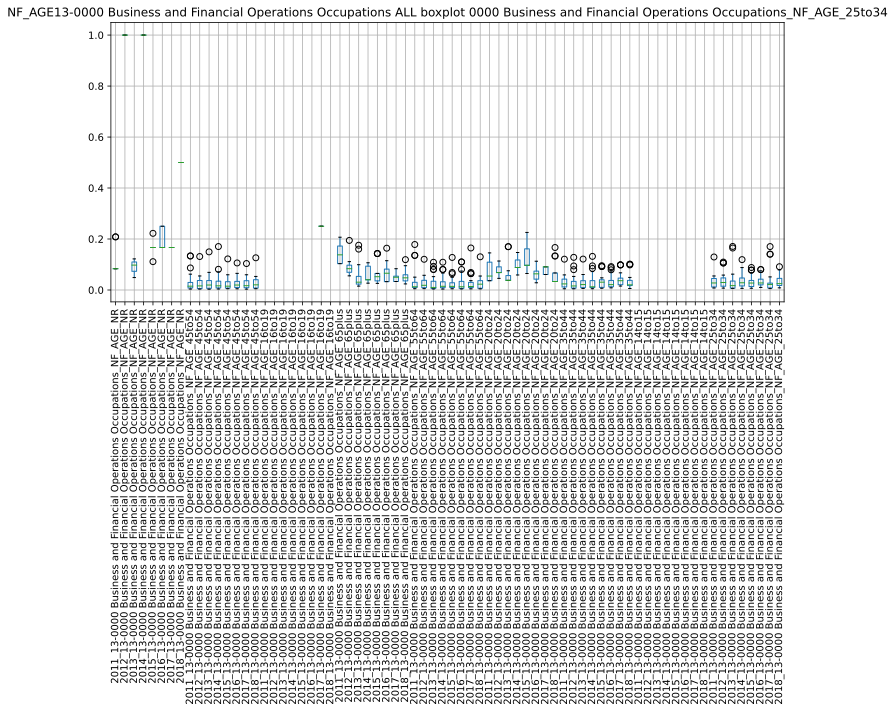

/usr/local/lib/python3.8/dist-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[1013/114220.259267:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114220.296869:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114220.858016:INFO:headless_shell.cc(660)] Written to file /tmp/tmptamtrz8p/temp.png.
[1013/114221.072918:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114221.110274:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[1013/114221.829649:INFO:headless_shell.cc(660)] Written to file /tmp/tmpmenr53so/temp.png.
[1013/114222.158581:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1013/114222.197010:WARNI

SyntaxError: not a PNG file (<string>)

In [6]:

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    global_y_soc1 = []

    for year in range(0,8):  
        print("########################################## NEW YEAR ###############################################")
        desired_file_output = "./NF_SUB_GENDER/NF_GENDER_" + str(2011+year) + "_"    
        %run ./analysis-code-subcat.ipynb
    
    print("########################################## BOX PLOTS ###############################################")
    gen_boxplot()

    print("########################################## CORRELATIONS ###############################################")
    gen_corr()